# Richmond Weather

An NOAA dataset has been stored in the file `data/richmond_weather_2005_2016.csv`. The data comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Documentation for this data can be found here https://www1.ncdc.noaa.gov/pub/data/cdo/documentation/GHCND_documentation.pdf (pdf) or here https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt (plain text).

Summary of data order:

- **Processing Completed** - 2017-06-07
  
- **Locations** - CITY:US510015
  
- **Begin Date** - 2005-12-31 00:00
  
- **End Date** - 2016-12-31 23:59
  
- **Data Types** - MDPR DAPR PRCP SNWD SNOW TAVG TMAX TMIN TOBS
  
- **Units** - Standard
  
- **Custom Flag(s)** - Station Name Geographic Location Include Data Flags
  
- **Eligible for Certification** - No

The initial section of the observations can be described as follows:

- **Station** - unique identifier. 17 characters

- **Station_Name** - name. up to 50 characters

- **Elevation** - tenths of meters

- **Latitude** - decimated degrees w/northern hemisphere values > 0,  southern hemisphere values < 0

- **Longitude** - decimated degrees w/western hemisphere values < 0, eastern hemisphere values > 0

- **Date** - the year of the record (4 digits) followed by month (2 digits) and day (2 digits)

Each type of data is in the following format:

- **CODE** - 4 character data type. Our set includes:

  - MDPR - Multiday Precipitation Total
  - DAPR - Number of Days in MDPR
  - PRCP - Precipitation
  - SNWD - Snow Depth
  - SNOW - Snowfall
  - TAVG - Temperature Average
  - TMAX - Temperature Maximum
  - TMIN - Temperature Minimum
  - TOBS - Temperature at Time of Observation

- **CODE_Measurement_Flag** - Single character flag. See PDF.

- **CODE_Quality_Flag** - Single character flag. See PDF.

- **CODE_Source_Flag** - Single character flag. See PDF.

- **CODE_Time_Of_Obs** - the (2 digit hour, 2 digit minute) 24 hour clock time of the observation given as the local time at the station of record

In [47]:
# library imports
import pandas as pd
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 51) # our base dataset
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
df = pd.read_csv('data/richmond_weather_2005_2016.csv')
print df.columns

Index([u'STATION', u'STATION_NAME', u'ELEVATION', u'LATITUDE', u'LONGITUDE',
       u'DATE', u'MDPR', u'Measurement Flag', u'Quality Flag', u'Source Flag',
       u'Time of Observation', u'DAPR', u'Measurement Flag.1',
       u'Quality Flag.1', u'Source Flag.1', u'Time of Observation.1', u'PRCP',
       u'Measurement Flag.2', u'Quality Flag.2', u'Source Flag.2',
       u'Time of Observation.2', u'SNWD', u'Measurement Flag.3',
       u'Quality Flag.3', u'Source Flag.3', u'Time of Observation.3', u'SNOW',
       u'Measurement Flag.4', u'Quality Flag.4', u'Source Flag.4',
       u'Time of Observation.4', u'TAVG', u'Measurement Flag.5',
       u'Quality Flag.5', u'Source Flag.5', u'Time of Observation.5', u'TMAX',
       u'Measurement Flag.6', u'Quality Flag.6', u'Source Flag.6',
       u'Time of Observation.6', u'TMIN', u'Measurement Flag.7',
       u'Quality Flag.7', u'Source Flag.7', u'Time of Observation.7', u'TOBS',
       u'Measurement Flag.8', u'Quality Flag.8', u'Source Flag.8',
  

Many of these columns need to be renamed, so time for a bit of data cleaning.

In [4]:
df = df.rename(columns={u'STATION': "Station",
                        u'STATION_NAME': "Station_Name",
                        u'ELEVATION': "Elevation",
                        u'LATITUDE': "Latitude",
                        u'LONGITUDE': "Longitude",
                        u'DATE': "Date",
                        u'MDPR': "MDPR_Multiday_Precipitation_Total",
                        u'Measurement Flag': "MDPR_Measurement_Flag",
                        u'Quality Flag': "MDPR_Quality_Flag",
                        u'Source Flag': "MDPR_Source_Flag",
                        u'Time of Observation': "MDPR_Time_Of_Obs",
                        u'DAPR': "DAPR_MDPR_Number_of_Days",
                        u'Measurement Flag.1': "DAPR_Measurement_Flag",
                        u'Quality Flag.1': "DAPR_Quality_Flag",
                        u'Source Flag.1': "DAPR_Source_Flag",
                        u'Time of Observation.1': "DAPR_Time_Of_Obs",
                        u'PRCP': "PRCP_Precipitation",
                        u'Measurement Flag.2': "PRCP_Measurement_Flag",
                        u'Quality Flag.2': "PRCP_Quality_Flag",
                        u'Source Flag.2': "PRCP_Source_Flag",
                        u'Time of Observation.2': "PRCP_Time_Of_Obs",
                        u'SNWD': "SNWD_Snow_Depth",
                        u'Measurement Flag.3': "SNWD_Measurement_Flag",
                        u'Quality Flag.3': "SNWD_Quality_Flag",
                        u'Source Flag.3': "SNWD_Source_Flag",
                        u'Time of Observation.3': "SNWD_Time_Of_Obs",
                        u'SNOW': "SNOW_Snowfall",
                        u'Measurement Flag.4': "SNOW_Measurement_Flag",
                        u'Quality Flag.4': "SNOW_Quality_Flag",
                        u'Source Flag.4': "SNOW_Source_Flag",
                        u'Time of Observation.4': "SNOW_Time_Of_Obs",
                        u'TAVG': "TAVG_Temperature_Average",
                        u'Measurement Flag.5': "TAVG_Measurement_Flag",
                        u'Quality Flag.5': "TAVG_Quality_Flag",
                        u'Source Flag.5': "TAVG_Source_Flag",
                        u'Time of Observation.5': "TAVG_Time_Of_Obs",
                        u'TMAX': "TMAX_Temperature_Maximum",
                        u'Measurement Flag.6': "TMAX_Measurement_Flag",
                        u'Quality Flag.6': "TMAX_Quality_Flag",
                        u'Source Flag.6': "TMAX_Source_Flag",
                        u'Time of Observation.6': "TMAX_Time_Of_Obs",
                        u'TMIN': "TMIN_Temperature_Minimum",
                        u'Measurement Flag.7': "TMIN_Measurement_Flag",
                        u'Quality Flag.7': "TMIN_Quality_Flag",
                        u'Source Flag.7': "TMIN_Source_Flag",
                        u'Time of Observation.7': "TMIN_Time_Of_Obs",
                        u'TOBS': "TOBS_Temperature_at_Time_Of_Observation",
                        u'Measurement Flag.8': "TOBS_Measurement_Flag",
                        u'Quality Flag.8': "TOBS_Quality_Flag",
                        u'Source Flag.8': "TOBS_Source_Flag",
                        u'Time of Observation.8': "TOBS_Time_Of_Obs"})
df.head()

,Station,Station_Name,Elevation,Latitude,Longitude,Date,MDPR_Multiday_Precipitation_Total,MDPR_Measurement_Flag,MDPR_Quality_Flag,MDPR_Source_Flag,MDPR_Time_Of_Obs,DAPR_MDPR_Number_of_Days,DAPR_Measurement_Flag,DAPR_Quality_Flag,DAPR_Source_Flag,DAPR_Time_Of_Obs,PRCP_Precipitation,PRCP_Measurement_Flag,PRCP_Quality_Flag,PRCP_Source_Flag,PRCP_Time_Of_Obs,SNWD_Snow_Depth,SNWD_Measurement_Flag,SNWD_Quality_Flag,SNWD_Source_Flag,SNWD_Time_Of_Obs,SNOW_Snowfall,SNOW_Measurement_Flag,SNOW_Quality_Flag,SNOW_Source_Flag,SNOW_Time_Of_Obs,TAVG_Temperature_Average,TAVG_Measurement_Flag,TAVG_Quality_Flag,TAVG_Source_Flag,TAVG_Time_Of_Obs,TMAX_Temperature_Maximum,TMAX_Measurement_Flag,TMAX_Quality_Flag,TMAX_Source_Flag,TMAX_Time_Of_Obs,TMIN_Temperature_Minimum,TMIN_Measurement_Flag,TMIN_Quality_Flag,TMIN_Source_Flag,TMIN_Time_Of_Obs,TOBS_Temperature_at_Time_Of_Observation,TOBS_Measurement_Flag,TOBS_Quality_Flag,TOBS_Source_Flag,TOBS_Time_Of_Obs
0,GHCND:USC00440327,ASHLAND VA US,67.1,37.75,-77.48333,20051231,-9999.0,,,,9999,-9999,,,,9999,0.00,P,,0,1800,0.0,P,,0,9999,0.0,P,,0,9999,-9999,,,,9999,55,,,0,1800,29,,,0,1800,45,,,0,1800
1,GHCND:USC00440327,ASHLAND VA US,67.1,37.75,-77.48333,20060101,-9999.0,,,,9999,-9999,,,,9999,0.00,P,,0,1800,0.0,P,,0,9999,0.0,P,,0,9999,-9999,,,,9999,50,,,0,1800,31,,,0,1800,42,,,0,1800
2,GHCND:USC00440327,ASHLAND VA US,67.1,37.75,-77.48333,20060102,-9999.0,,,,9999,-9999,,,,9999,0.36,,,0,1800,0.0,P,,0,9999,0.0,P,,0,9999,-9999,,,,9999,45,,,0,1800,27,,,0,1800,41,,,0,1800
3,GHCND:USC00440327,ASHLAND VA US,67.1,37.75,-77.48333,20060103,-9999.0,,,,9999,-9999,,,,9999,0.36,,,0,1800,0.0,P,,0,9999,0.0,P,,0,9999,-9999,,,,9999,43,,,0,1800,40,,,0,1800,40,,,0,1800
4,GHCND:USC00440327,ASHLAND VA US,67.1,37.75,-77.48333,20060104,-9999.0,,,,9999,-9999,,,,9999,0.00,P,,0,1800,0.0,P,,0,9999,0.0,P,,0,9999,-9999,,,,9999,45,,,0,1800,37,,,0,1800,45,,,0,1800


In [5]:
s = df.shape
print s[0], "rows,", s[1], "columns"

32982 rows, 51 columns


## Temperatures in Richmond Area

We have a number of monitoring stations, let's see how different their observations of temperature are.

In [59]:
# df['Station'].nunique() - 22 stations
stations = df['Station'].unique()
station_names = {}

# station_names has the id:name pairs
for station in list(stations):
    # beware na values - series.dropna() is important here
    name = df['Station_Name'].where(df['Station'] == station).dropna().values[0]
    station_names[station] = name

df['Date'] = df['Date'].astype(str)

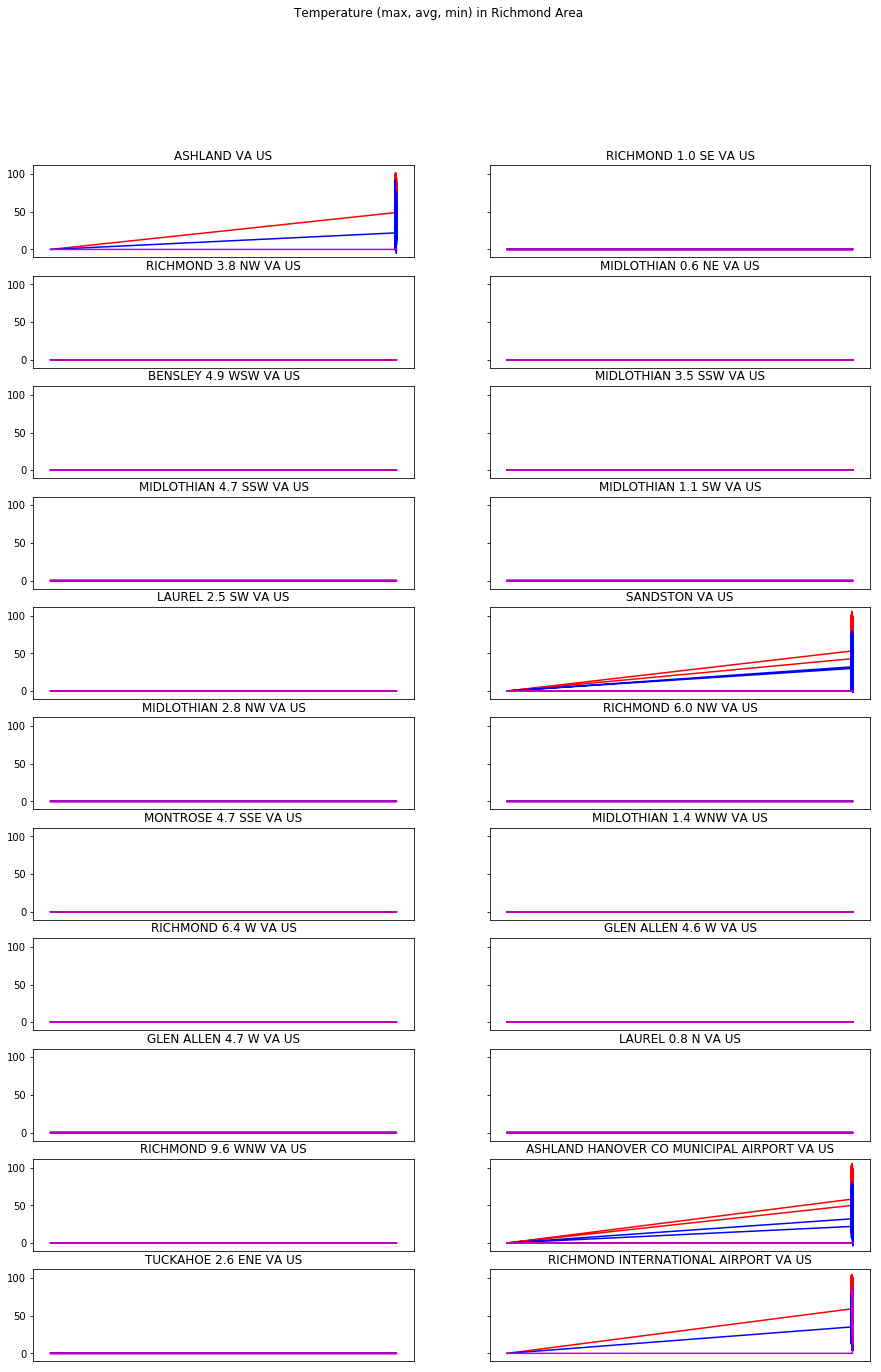

In [75]:
# start building the plots
plt.figure()
fig, axs = plt.subplots(11,2, sharey=True) # 11 rows, 2 columns = 22 plots
fig.suptitle("Temperature (max, avg, min) in Richmond Area")
fig.set_figheight(22) # 22 inches enough?
fig.set_figwidth(15) # 15 inches enough?

# associate a station with a subplot
assoc = zip(list(axs.reshape(-1)), stations)

# build the subplots
for ax, st in assoc:
    ax.set_title(station_names[st])
    
    # the set we are concerned with
    data = df[['Date',
               'TMAX_Temperature_Maximum',
               'TAVG_Temperature_Average',
               'TMIN_Temperature_Minimum']].where(df['Station'] == st)
    
    # identify na temperature values (original data did not use na)
    na_vals = {9999: np.NaN, -9999: np.NaN, 9999.0: np.NaN, -9999.0: np.NaN}
    
    data = data.replace(to_replace = {'TMAX_Temperature_Maximum': na_vals,
                                      'TAVG_Temperature_Average': na_vals,
                                      'TMIN_Temperature_Minimum': na_vals})
    # zero out our na temperature values
    data = data.fillna(0)
    
    # tell pyplot that our x axis is dates
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y%m%d'))
    ax.xaxis.set_major_locator(mdates.WeekdayLocator(byweekday=mdates.MO, interval=2))
    
    # plot max temp - red
    ax.plot(data['Date'], data['TMAX_Temperature_Maximum'], 'r-')
    # plot min temp - blue
    ax.plot(data['Date'], data['TMIN_Temperature_Minimum'], 'b-')
    # plot avg temp - magenta
    ax.plot(data['Date'], data['TAVG_Temperature_Average'], 'm-')
    

# auto-format the x axis
#fig.autofmt_xdate()

plt.show()